# Tests of old and new rsoopic cross section models for electron-impact ionization of $H_2$

Directly call rsoopic.h2crosssections methods and try to determine if the output is correct

In [1]:
import sys
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import c, e, m_e
import rsoopic.h2crosssections as h2crosssections
# Since PYTHONPATH is ignored, modify sys.path directly...
#sys.path.insert(1, '/home/vagrant/jupyter/rsoopic/rsoopic')
#import h2crosssections
import random

# Warp
# Origin date: Mon, 2 Jul 2018 16:00:48 -0600
# Local date: Mon, 2 Jul 2018 16:00:48 -0600
# Commit hash: b464829
# /home/vagrant/.pyenv/versions/py2/lib/python2.7/site-packages/warp/warp.pyc
# /home/vagrant/.pyenv/versions/py2/lib/python2.7/site-packages/warp/warpC.so
# Tue Sep 18 22:14:17 2018
# import warp time 0.459253072739 seconds
# For more help, type warphelp()


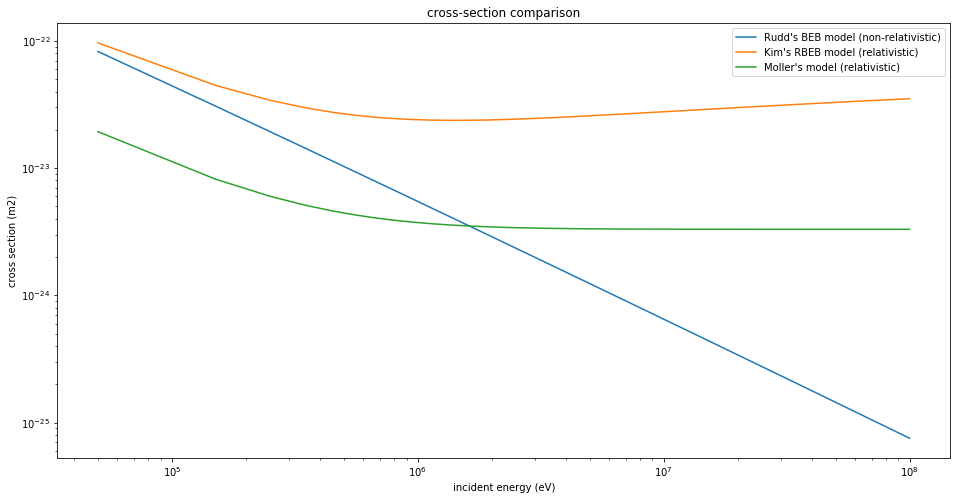

SystemExit: 0

/home/vagrant/.pyenv/versions/py2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2890: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [2]:
Tmax = 100.e6 # maximal incident energy (in eV)
n = 1000
T = np.linspace(.5 / n * Tmax, (1. - .5 / n) * Tmax, n) # incident energy in eV
gamma = e * T / (m_e * c**2) + 1.
v_T = c * np.sqrt(1. - np.divide(1., gamma**2))

sigma = np.empty((n))
for i in range(n):
 sigma[i] = h2crosssections.h2_ioniz_crosssection(v_T[i])

plt.figure(figsize=(16,8))
plt.loglog(T, sigma, label='Rudd\'s BEB model (non-relativistic)')
plt.title('cross-section comparison')
plt.xlabel('incident energy (eV)')
plt.ylabel('cross section (m2)')

# load module with updated version
sys.path.insert(1, '/home/vagrant/jupyter/rsoopic/rsoopic')
import h2crosssections
for i in range(n):
 sigma[i] = h2crosssections.h2_ioniz_crosssection(v_T[i])

plt.loglog(T, sigma, label='Kim\'s RBEB model (relativistic)')

h2crosssections.useMollerApproximation = True
for i in range(n):
 sigma[i] = h2crosssections.h2_ioniz_crosssection(v_T[i])

plt.loglog(T, sigma, label='Moller\'s model (relativistic)')

plt.legend(loc = 'upper right')
plt.savefig('Xsect_analysis0.png')
plt.show()
sys.exit(0)

.ejectedEnergy and rsoopic.h2crosssections.generateAngle to check that the energy spectrum and angular distribution, respectively, of emitted electrons look OK. Unit tests will later be developed based on the code snippets below.

In [ ]:
gamma = lambda v: math.sqrt(1./(1.-v*v/(c*c)))
#for i in range(10):
#    beta = 0.1949 + 0.00001 * i
#    v = beta * c
#    print i, beta, m_e * c * c * (gamma(v) - 1.) / e

#sys.exit(0)

#beta = 0.06247 # for 1 keV kinetic energy
beta = 0.19499 # for 10 keV kinetic energy
n = 1000
v = np.full((n), beta * c)

energy = h2crosssections.ejectedEnergy(v, n)
print 'max. particle energy: ', energy.max(), ' eV'

eps = np.full((n), m_e * c * c * (gamma(beta * c) - 1.) / e) # incident energy in eV
angle = h2crosssections.generateAngle(n, energy, eps)
angle *= 180. / math.pi

Xsect_fig_1, [ax1, ax2] = plt.subplots(1, 2, figsize=(16, 8))

plt.suptitle('emitted electrons with 10 keV ionizing electron beam (rsoopic cross section)')

ax1.hist(energy, 100)
ax1.set_title('energy spectrum of emitted e- with 10 keV e- beam')
ax1.set_xlabel('energy (eV)')
ax1.set_ylabel('particle count')
ax2.hist(angle, 90)
ax2.set_title('angular distribution of emitted e- with 10 keV e- beam')
ax2.set_xlabel('angle (deg)')
ax2.set_ylabel('particle count')
ax2.grid(True)
plt.savefig('Xsect_analysis1.png')
plt.show()

## Moller cross section

Implementation of pure Moller cross section for comparison

In [ ]:
eps_min = 10. # value picked to give good agreement with rsoopic cross section results above
Ce = 2.0 * m_e * c * c / e

for i in range(n):
    Xrand = random.random()
    energy[i] = eps[i] * eps_min / (eps[i] - Xrand * (eps[i] - 2 * eps_min))
    costheta = energy[i] * (eps[i] + Ce)
    costheta /= eps[i] * (energy[i] + Ce)
    costheta = math.sqrt(costheta)
    angle[i] = 180. / math.pi * math.acos(costheta)

Xsect_fig_2, [ax1, ax2] = plt.subplots(1, 2, figsize=(16, 8))

plt.suptitle('emitted electrons with 1 keV ionizing electron beam (Moller cross section)')

ax1.hist(energy, 100)
ax1.set_title('energy spectrum of emitted e- with 10 keV e- beam')
ax1.set_xlabel('energy (eV)')
ax1.set_ylabel('particle count')
ax2.hist(angle, 90)
ax2.set_title('angular distribution of emitted e- with 10 keV e- beam')
ax2.set_xlabel('angle (deg)')
ax2.set_ylabel('particle count')
ax2.grid(True)
plt.savefig('Xsect_analysis2.png')
plt.show()

The emitted-electron energy spectrum with the existing rsoopic cross section is in reasonable agreement with Moller at 1keV incident energy, but the angular distribution is much broader.

## Angular spread isolated

Calculate angular distribution with both incident and emitted energy held fix

In [ ]:
Xsect_fig_3, axes = plt.subplots(5, 1, figsize=(16, 8))
#print shape(axes)
plt.suptitle('angular spread isolated')

angle = 180. / math.pi * h2crosssections.generateAngle(n, 0.5 * eps, eps)
axes[0].hist(angle, 90)
axes[0].set_title('emitted energy = 50% of incident energy')
axes[0].set_xlabel('angle (deg)')
axes[0].set_ylabel('particle count')
axes[0].grid(True)
axes[0].set_xlim([0, 120])

angle = 180. / math.pi * h2crosssections.generateAngle(n, 0.4 * eps, eps)
axes[1].hist(angle, 90)
axes[1].set_title('emitted energy = 40% of incident energy')
axes[1].set_xlabel('angle (deg)')
axes[1].set_ylabel('particle count')
axes[1].grid(True)
axes[1].set_xlim([0, 120])

angle = 180. / math.pi * h2crosssections.generateAngle(n, 0.2 * eps, eps)
axes[2].hist(angle, 90)
axes[2].set_title('emitted energy = 20% of incident energy')
axes[2].set_xlabel('angle (deg)')
axes[2].set_ylabel('particle count')
axes[2].grid(True)
axes[2].set_xlim([0, 120])

angle = 180. / math.pi * h2crosssections.generateAngle(n, 0.01 * eps, eps)
axes[3].hist(angle, 90)
axes[3].set_title('emitted energy = 1% of incident energy')
axes[3].set_xlabel('angle (deg)')
axes[3].set_ylabel('particle count')
axes[3].grid(True)
axes[3].set_xlim([0, 120])

angle = 180. / math.pi * h2crosssections.generateAngle(n, 40. * eps, 100. * eps)
axes[4].hist(angle, 90)
axes[4].set_title('emitted energy = 40% of incident energy of 1 MeV')
axes[4].set_xlabel('angle (deg)')
axes[4].set_ylabel('particle count')
axes[4].grid(True)
axes[4].set_xlim([0, 120])

plt.savefig('Xsect_analysis3.png')
plt.show()